# Combined Recent Surveys
This notebook make predictions for the combined features and cross border predictions.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install world-bank-data

In [4]:
cd /content/drive/MyDrive/src

/content/drive/MyDrive/src


In [5]:
from lib import estimator_util as eu
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string

In [6]:
sns.set_theme()

In [7]:
continent: str = 'africa'
models: list = range(3)
model_names: list = ['ResNet18', 'ResNet50', 'ResNet152']

In [8]:
complete_dfs = []
all_cols_list = []

for model in models:
    complete_df, all_cols = eu.get_data(f"../data/continents/{continent}/lsms/processed/_all_real.csv", f"../data/continents/{continent}/model_{model}/cnn_features/cnn.csv", f"../data/continents/{continent}/")
    complete_dfs.append(complete_df)
    all_cols_list.append(all_cols_list)

## Heatmap for cross country

In [9]:
def heatmap(data, j):
    countries = ["Nigeria", "Ethiopia" ,"Tanzania", "Malawi", "Uganda", "Niger", "Mali", "Pooled"]
    df_cm = pd.DataFrame(data, index = countries, columns = countries)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, cbar_kws={'label': r'$r^2$'})
    plt.xlabel("Country trained on")
    plt.ylabel("Country evaluated on")
    ax = plt.gca()
    plt.text(-0.1, 1.1, string.ascii_uppercase[0], size=20, weight='bold', transform=ax.transAxes)
    plt.savefig(f"../data/continents/{continent}/{model_names[j]}/figs/cross_country_pooled.pdf", dpi=600, bbox_inches="tight")

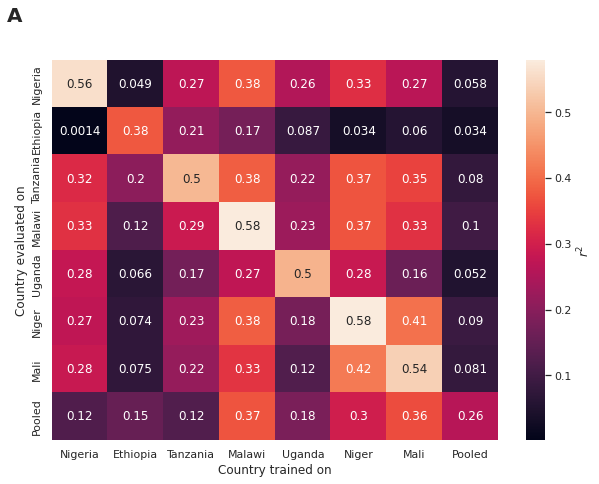

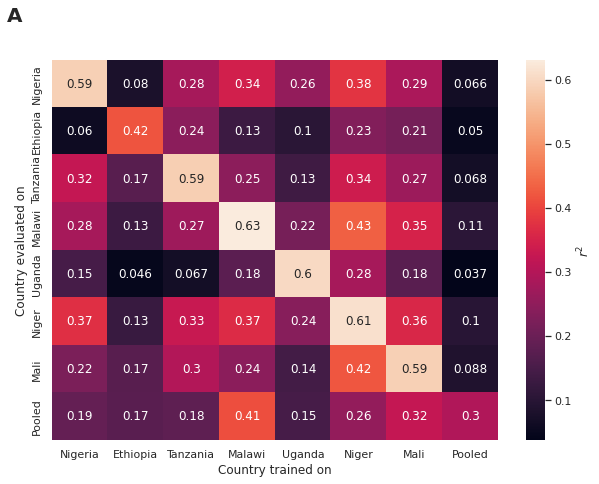

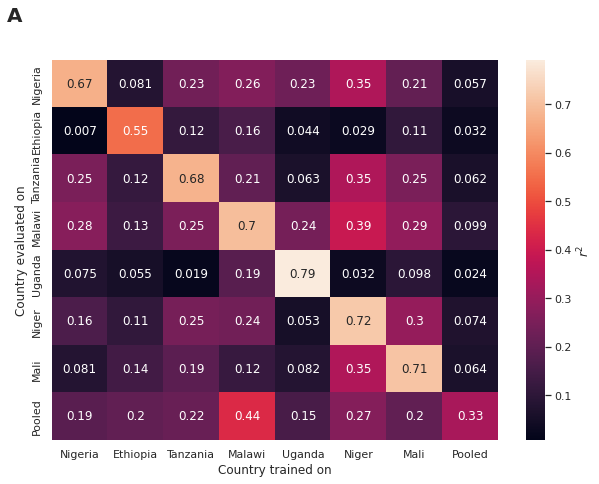

In [10]:
for k, complete_df in enumerate(complete_dfs):
    countries = [["NG"], ["ETH"] ,["TZA"], ["MW"], ["UGA"], ["NER"], ["MLI"], ["NG", "ETH", "TZA", "MW", "UGA", "NER", "MLI"]]
    arr = np.zeros((8,8))
    for i, country in enumerate(countries):
        X, y = eu.get_recent_features(complete_df, country, all_cols)
        for j, out_country in enumerate(countries):
            X_out, y_out = eu.get_recent_features(complete_df, out_country, all_cols)
            r, _, m = eu.run_ridge_out(X, y, X_out, y_out)
            arr[i,j] = r
    heatmap(arr, k)

## Pooled Dataset

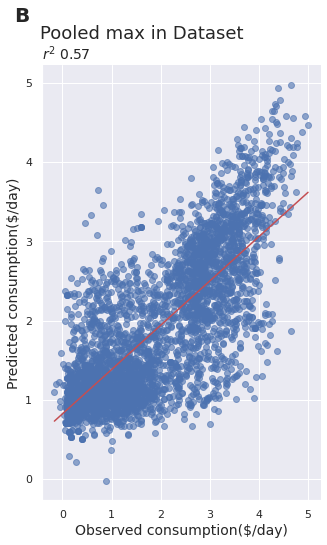

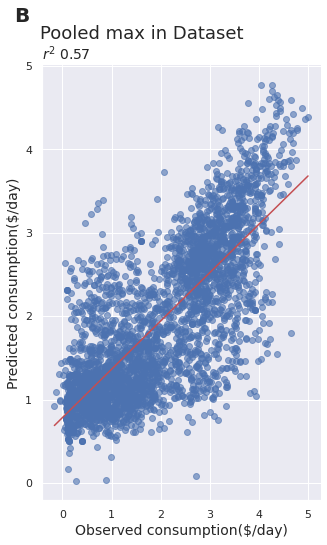

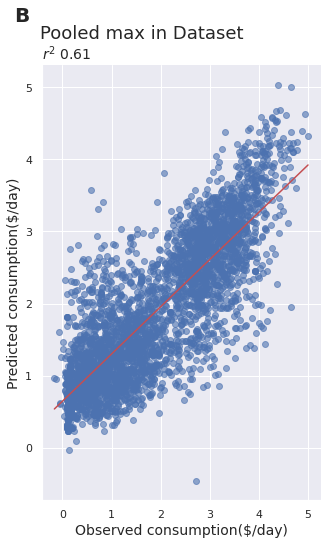

In [11]:
for j, complete_df in enumerate(complete_dfs):
    X, y = eu.get_recent_features(complete_df, ["NG", "ETH", "TZA", "MW", "UGA", "NER", "MLI"], all_cols, scale_cnn=False)
    r2, y_hest, model = eu.run_ridge(X, y)
    fig = eu.plot_predictions(y, y_hest,r2, "Pooled", "max in Dataset", 1, x_label=True)
    plt.savefig(f"../data/continents/{continent}/{model_names[j]}/figs/pooled_max_year.pdf", dpi=600, bbox_inches="tight")